In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
import seaborn as sns
import scipy.stats as st
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels as statm
from scipy.stats import norm, f
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LogisticRegression
import math
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
def get_cleaned_data():
    data = pd.read_csv('/home/tal/Downloads/athletes.csv')
    data['dob'] = pd.to_datetime(data["dob"], format='%m/%d/%y')
    data['age'] = (pd.to_datetime('now') - data['dob']).astype('<m8[Y]')
    data['age'] = data['age'].astype(float)
    data = data.loc[data['age'] > 0, :]
    data = data.dropna()
    data["total"] = data[['gold', 'silver', 'bronze']].agg(sum, axis=1)
    data['gender']=data['sex'].copy()
    data['gender']= data['gender'].apply(lambda x: 1 if x=='Female' else 2)
    data['won'] = data['total'].apply(lambda x: x if x>0 else x+0.1)#1 if x == 0 else x)
    return data

In [3]:
def get_sample(data):
    winners = data.loc[data['won']>0.5, :]
    winners_sample = winners.sample(n=200, random_state=1)
    winners_sample.to_csv('winners_sample.csv')
    winners = winners[['height', 'weight', 'age', 'sport', 'sex', 'won', 'total','gender']]
    sample = data.sample(n=200, random_state=1)
    return sample

In [4]:
def section1():
    whole_df = get_cleaned_data()
    sample = get_sample(whole_df)
    return whole_df, sample

In [5]:
whole_df, sample = section1()
explaining_vars_row = ['weight', 'gender', 'won']
explained_var = ['age']
mask_bronze = whole_df['bronze'] == 1
mask_gold = whole_df['gold'] == 1
mask_silver = whole_df['silver'] == 1
mask_winners = mask_bronze|mask_gold|mask_silver
winners = whole_df.loc[mask_winners,:]
not_winners = whole_df.loc[~mask_winners,:]
winners_stats = winners.describe()
not_winners_stats = not_winners.describe()
groups = whole_df.groupby(['won'])


In [6]:
styles = [
    dict(selector="tr:hover",
                props=[("background", "#F1E189"), ('format',"{:.3%}")]),
    dict(selector="th", props=[("color", "#7B2869"),
                               ("border", "3px solid #7B2869"),
                               ("padding", "13px 35px"),
                               ("border-collapse", "collapse"),
                               ("background", "#F9C5D5"),
                               ("font-size", "18px"),
                               ("font-family" , 'system-ui'),
                               ('text-align', 'center'),
                               ('font-weight','bold')
                               ]),
    dict(selector="td", props=[("color", "#9D3C72"),
                               ("border", "3px solid #7B2869"),
                               ("padding", "35px 55px"),
                               ("border-collapse", "collapse"),
                               ("font-size", "15px"),
                               ("font-family" , 'system-ui'),
                               ('text-align', 'center'),
                               ("background", "#FEE3EC"),
                               ('Quantity',"{:.3%}"),
                               ('font-weight','bold')
                               ]),
    dict(selector="table", props=[
                                    ("font-family" , 'system-ui'),
                                    ("margin" , "25px auto"),
                                    ("border-collapse" , "collapse"),
                                    ("border" , "1px solid #9DE3D0"),
                                    ("border-bottom" , "2px solid #00cccc"),
                                    ('Quantity',"{:.3%}")
                                      ]),
]

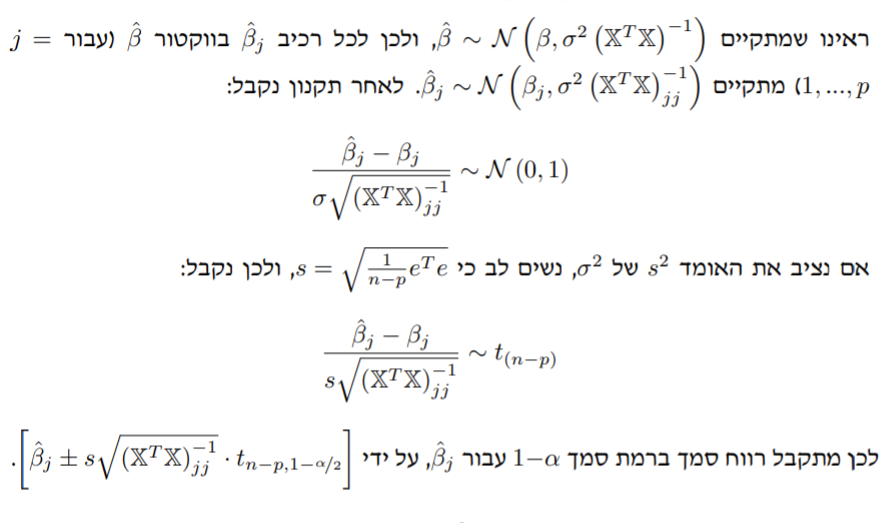

In [7]:
def df2np(data : DataFrame,y_data):
    raw_x = data.to_numpy()
    n = raw_x.shape[0]
    bias_col = np.ones((n,1))
    X = np.concatenate([bias_col,raw_x],axis = 1)
    y = y_data.to_numpy()
    return X,y

In [8]:
def set_linearRegrssionParams(data : DataFrame,explaining_vars,explained_var):
    # raw_x = data.loc[:,['weight', 'gender', 'won']].to_numpy()
    # n = raw_x.shape[0]
    # bias_col = np.ones((n,1))
    # X = np.concatenate([bias_col,raw_x],axis = 1)
    # y = data['age']\.to_numpy()
    y = data['age']
    x_data = data.loc[:,['weight', 'gender', 'won']]
    X, y = df2np(x_data,y)
    n = X.shape[0]
    p = X.shape[1]
    Cov = np.matmul(X.T,X)
    # display(raw_x)
    invCov = np.linalg.pinv(Cov)
    P = np.matmul(np.matmul(X, invCov),X.T)
    Q = np.eye(P.shape[0]) - P
    beta = np.matmul(invCov, np.matmul(X.T,y))
    return X,y,Cov ,invCov,P,Q,beta

In [9]:
def linear_regression():
    regressor = LinearRegression().fit(X,y)
    beta =[27.983130,0.060873,0.000,0.777799]
    y_pred, beta = regressor.predict(X),regressor.coef_
    beta = beta.T
    e =  y - y_pred
    eps = y - np.matmul(X,beta)
    eTe = np.matmul(e.T,e)
    s = np.sqrt((1 / (n-p)) * eTe)
    #return regressor,y_pred,beta,e,eps,eTe,s
    return regressor,y_pred,e,eps,eTe,s

In [10]:
B = 400
whole_df, sample = section1()
explained_var = ['age']
#sample['won'] = sample['won'].apply(lambda x: 1 if x == True else 0)
explaining_vars = ['weight', 'gender', 'won']
X,y,Cov,invCov,P,Q,beta = set_linearRegrssionParams(data = sample,explaining_vars=explaining_vars,explained_var=explained_var)
#X,y,Cov = set_linearRegrssionParams(sample,explaining_vars,explained_var)
n = X.shape[0]
p = X.shape[1]
#regressor,y_pred,beta,e,eps,eTe,s = linear_regression()
regressor,y_pred,e,eps,eTe,s = linear_regression()
beta


array([ 5.692018  ,  0.05647513, 11.38403601,  0.65259   ])

In [11]:
# def SE_NormalCov(X,invCov):
#     cov_X = np.matmul(X.T,X)
#     inv_cov = np.linalg.inv(cov_X)
#     indices = list(range(4))
#     t_crit = st.norm.ppf(0.975)
#     se_NormalCovCI = {'b0':0,'b1':0,'b2':0,'b3':0}
#     for j,coef_key in enumerate(se_NormalCovCI.keys()):   
#         j_stat = s * np.sqrt(inv_cov[j,j]) * t_crit
#         CI_j = [beta[j] - j_stat , beta[j] + j_stat] 
#         se_NormalCovCI[coef_key] = CI_j
#     return se_NormalCovCI

In [12]:
# def SE_NormalBootstrap(dataFrame):
    # num_coefs = 
    # bootstrap_means = []
    # for b in range(B):
    #     sample = dataFrame.sample(frac=1,replace=True)
    #     sample_mean = sample.mean()
    #     bootstrap_means.append(sample_mean)
    # for coeff in range()
    #     boostrap_se = np.sqrt(np.std(bootstrap_means))
    # return boostrap_se

In [13]:
# def NormalAprox_BoostrapSE(X,boostrap_se):
#     t_crit = st.norm.ppf(0.975)
#     se_NormalBoostrapCI = {'b0':0,'b1':0,'b2':0,'b3':0}
#     for j,coef_key in enumerate(se_NormalBoostrapCI.keys()):   
#         j_stat = s * np.sqrt(inv_cov[j,j]) * t_crit
#         CI_j = [beta[j] - j_stat , beta[j] + j_stat] 
#         se_NormalBoostrapCI[coef_key] = CI_j
    # return se_NormalBoostrapCI

In [14]:
def SE_NormalCov(dataframe,beta,invCov):
    indices = list(range(4))
    l = beta - 1.96 * np.sqrt(np.diag(invCov))
    u = beta + 1.96 * np.sqrt(np.diag(invCov))
    return [l,u]

def SE_NormalBootstrap(dataframe,beta):
    bootstrap_means = []
    for b in range(B):
        sample = dataframe.sample(frac=1,replace=True)
        X = sample[['weight', 'gender', 'won']]
        y = sample[['age']]
        X = sm.add_constant(X)
        X,y = df2np(X,y)
        bootstrap_means.append(np.linalg.pinv(X.T @ X) @ X.T @ y)
    boostrap_se = np.std(np.array(bootstrap_means),axis=1)
    l = beta - 1.96 * boostrap_se
    u = beta + 1.96 * boostrap_se
    return [l,u]


# def Boostrap_NormalAproxSE(dataframe,beta):
#     normalaproxCI = []
#     for b in range(B):
#         sample = dataframe.sample(frac=1,replace=True)
#         X = sample[['weight', 'gender', 'won']].to_numpy()
#         y = sample[['age']].to_numpy()
#         X = sm.add_constant(X)
#         print(X)
#         normalaproxCI.append(np.linalg.pinv(X.T @ X) @ X.T @ y)
#     boostrap_se = np.std(normalaproxCI,axis=0)
#     l = np.quantile(boostrap_se, 0.025, axis=0)
#     u = np.quantile(boostrap_se, 1 - 0.025, axis=0)
#     return [l,u]

def Bootstrap_Pivotal(dataframe,beta):
    pivotalCI = []
    for b in range(B):
        sample = dataframe.sample(frac=1,replace=True)
        X = sample[['weight', 'gender', 'won']]
        y = sample[['age']]
        X = sm.add_constant(X)
        pivotalCI.append(np.linalg.pinv(X.T @ X) @ X.T @ y)
    boostrap_se = np.std(pivotalCI,axis=0)
    l = np.quantile(boostrap_se, 0.025, axis=0)
    u = np.quantile(boostrap_se, 1 - 0.025, axis=0)
    return [l,u]

def Bootstrap_Quantile(dataframe,beta):
    quantileCI = []
    for b in range(B):
        sample = dataframe.sample(frac=1,replace=True)
        X = sample[['weight', 'gender', 'won']]
        y = sample[['age']]
        X = sm.add_constant(X)
        quantileCI.append(np.linalg.pinv(X.T @ X) @ X.T @ y)
    boostrap_se = np.std(quantileCI,axis=0)
    l = np.quantile(boostrap_se, 0.005, axis=0)
    u = np.quantile(boostrap_se, 1 - 0.005, axis=0)
    return [l,u]

In [ ]:
def calc_bootstrap_stat(sample, n_bootstraps=400):
    beta_bootstraps = []
    for i in range(n_bootstraps):
        sub_df_boot = sample.sample(n=200, replace=True, random_state=i)
        X_boot = sub_df_boot
        y_boot = sub_df_boot['age']
        X_boot = X_boot.drop(['age'], axis=1)
        X_boot = sm.add_constant(X_boot)
        beta_bootstraps.append(np.linalg.pinv(X_boot.T @ X_boot) @ X_boot.T @ y_boot)
    return np.array(beta_bootstraps)

whole_df, sample = section1() #whole_df[['weight', 'gender', 'won','age']].sample(n=200, replace=True)
se_boot = np.std(calc_bootstrap_stat(sample), axis=0)
a2_boot_CI_l = beta - 1.96 * se_boot
a2_boot_CI_r = beta + 1.96 * se_boot

for i in range(len(beta)):
    print(f"a2_boot_CI for beta{i} = [ {a2_boot_CI_l[i]}, {a2_boot_CI_r[i]}]")
    print(f'\tlen: {a2_boot_CI_r[i] - a2_boot_CI_l[i]}')
    print(f"\tInterval contains the true value of beta: {a2_boot_CI_l[i] <= beta[i] <= a2_boot_CI_r[i]}")

In [ ]:
# def Bootstrap_Quantile():
#     indices = list(range(4))
#     t_crit = st.norm.ppf(0.975)
#     se_BoostrapQuantileCI = {'b0':0,'b1':0,'b2':0,'b3':0}
#     boostrap_se = SE_NormalBootstrap(X)
#     for j,coef_key in enumerate(se_NormalBoostrapCI.keys()):
#         low = np.quantile(boostrap_se, 0.05, axis=0)
#         high = np.quantile(boostrap_se, 1 - 0.05, axis=0)
#         CI_j = [beta[j] - j_stat , beta[j] + j_stat] 
#         se_BoostrapQuantileCI[coef_key] = CI_j
#     return se_BoostrapQuantileCI

In [ ]:
def y_new_pred(x_new):
    return regressor.predict(x_new)

In [ ]:
def CI_lenCompare(dataframe,beta,invCov):
    a = SE_NormalCov(dataframe,beta,invCov)
    b = SE_NormalBootstrap(dataframe,beta)
    c = Bootstrap_Pivotal(dataframe,beta)
    d = Bootstrap_Quantile(dataframe,beta)
    cis = [a,b,c,d]
    lengths = {'b0':[],'b1':[],'b2':[],'b3':[]}
    for i,ci in enumerate(cis):
        u = ci[1]
        l = ci[0]
        print(u)
        lengths['b0'].append(u[0] - l[0])
        lengths['b1'].append(u[1] - l[1])
        lengths['b2'].append(u[2] - l[2])
        lengths['b3'].append(u[3] - l[3])
            #lengths = [ci[1] - ci[0] for ci in cis]  
    #print(f'For each coeff in Beta, comparing the CI length in each of the 4 methods')
    #for i,ci in enumerate(cis):
        #print(f'CI {i}- normal aproximation with se estimated on the covariance matrix of beta : {ci} , len : {lengths[i]}')
    for i,key in enumerate(lengths.keys()):
        print(f"CI length for {key} in each of the CI's : {lengths[key]}")
    return cisi,

In [ ]:
#boostrap_se = SE_NormalBootstrap(whole_df)
cis = CI_lenCompare(sample,beta,invCov)
cis

## **Q2**

In [ ]:
B = 400
whole_df, sample = section1()
explained_var = ['age']
#sample['won'] = sample['won'].apply(lambda x: 1 if x == True else 0)
explaining_vars = ['weight', 'gender', 'won']
X,y,Cov,invCov,P,Q,beta = set_linearRegrssionParams(data = whole_df,explaining_vars=explaining_vars,explained_var=explained_var)
n = X.shape[0]
p = X.shape[1]
regressor,y_pred,e,eps,eTe,s = linear_regression()
beta


In [ ]:
y_ticks = range(len(CI.keys))
fig, ax = plt.subplots(5, figsize=(10, 20))
# fig.subplots_adjust(hspace=0.5) #Space between plots
colors = ["r", "skyblue" , "g", "y"]

for i in range(len(CI_dict["pivot"]["beta"])):
    j = 0
    for index, k in enumerate(CI_dict.keys()):
    length = round(CI_dict[k]['upper'][i] - CI_dict[k]['lower'][i], 3)
    ax[i].plot((CI_dict[k]['lower'][i],CI_dict[k]['upper'][i]),(j,j),'ro-',
               color=colors[index], label =f"Length of the CI: {length}")
    j += 1
    ax[i].set_yticks(range(len(CI_dict.keys())))
    ax[i].set_yticklabels(list(CI_dict.keys()))
    ax[i].axvline(x = beta_est_all[i], color = 'b', label = f'{CI_dict["pivot"]["beta"][i]} from all of the data')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    beta_i = CI_dict["pivot"]["beta"][i]
    ax[i].set_title(f"confidence intervals for {beta_i}:")
plt.show()

In [ ]:
def CI_containCoefs(beta):
    
    print(f"For vector beta (Regrresion Coeffisions vector estimator) based on the complete Data Set, check if the CI contains Beta's coeffisions in each of the 4 methods" )

In [ ]:
def sample100(whole_df,sample):
    new_sample = whole_df.drop(sample.index)
    new_sample = new_sample.sample(n=100,random_state=1)
    X_n = new_sample[['weight', 'gender', 'won']].to_numpy()
    y_n = np.matmul(X_n,beta)
    return X_n, y_n

In [183]:
def boostrap_CI(y_new,x_new,chosen_boostrap = 'Quantile_Boostrap'):
    print(f"For the expectaion of Y|X new sampels, Calculate the aproximate CI with 95% confidence with {chosen_boostrap} method")

In [184]:
def Y_in_CI_porportion(y_new):
    y_pred_new = []
    for i in range(B):
        sample_b = heart_disease_sample_new.sample(n=200,replace=True)
        X_b_new = sample_b[["BMI","diaBP" ,"age", "education"]].to_numpy()
        X_b_new = np.concatenate([np.ones((X_b_new.shape[0],1),dtype=X_b_new.dtype), X_b_new], axis=1)
        y_new_b = sample_b["sysBP"].to_numpy()
        beta_est_b = np.matmul(np.linalg.inv(np.matmul(X_b_new.T,X_b_new)), np.matmul(X_b_new.T,y_new_b))
        y_pred_new.append(X_new @ beta_est_b)

    y_pred_new = np.array(y_pred_new)
    CI_dict_y = {}
    for i in range(len(y_pred_new[0])):
        ci = [y_pred_new[:, i].mean()-qz*y_pred_new[:, i].std(), y_pred_new[:, i].mean()+qz*y_pred_new[:, i].std()]
        CI_dict_y[i] = ci
    print(f"For new sample Y_new, Calculate the porportion of CI containing y_new from all the calculated CI.")
    print(f"Is it close to 95% confidence ? well, {founded_confidence} % is pritty close/far to 95%")

SyntaxError: invalid syntax (3627853168.py, line 2)

In [ ]:
def describe_CI_calc_for_Y():
    for i in range(len(y_pred)):
        if CI_dict_y[i][0] <= y_pred[i] <= CI_dict_y[i][1]:
            in_interval += 1
    answer = f""
    print("By the guidance of question 1 described in tutorial 5, variance of Y is constracted from 2 factors - one depends on noise and other on estimating.")
    print(answer)

In [22]:
qnorm = st.norm.ppf(0.975)
gap = qnorm * boostrap_se
lower_bound = np.quantile(corr_plugIn, 0.025)
upper_bound = np.quantile(corr_plugIn, 0.975)
CI_Normal = [plugIn_estimator - gap, plugIn_estimator + gap]
CI_PivotalBoost = [plugIn_estimator * 2 - upper_bound, plugIn_estimator * 2 + lower_bound]
CI_QuantileBoost = [lower_bound,upper_bound]

strs= [f"[ plugIn_estimator - qnorm * Boostrap SE ,"
       f" plugiIn_estimator + qnorm * Boostrap SE ]",
       f"[ plugIn_estimator * 2 - upper_quantile ,"
       f" plugiIn_estimator * 2 + lower_quantile ]",
          '[ lower_quantile , upper_quantile ]']

CI_df = pd.DataFrame.from_dict({"CI Type":['Nornal Appromixation','Pivotal','Quantile'],'_':strs,"":[CI_normal,CI_pivotal,CI_quantile]}).set_index('CI Type')



CI_df.style.set_table_styles(styles).hide(axis='columns')

CI Type,,
Nornal Appromixation,"[ plugIn_estimator - qnorm * Boostrap SE , plugiIn_estimator + qnorm * Boostrap SE ]","[0.508270290702971, 1.044478691875843]"
Pivotal,"[ plugIn_estimator * 2 - upper_quantile , plugiIn_estimator * 2 + lower_quantile ]","[0.5860367633107508, 2.0017510569280383]"
Quantile,"[ lower_quantile , upper_quantile ]","[0.4490020743492243, 0.9667122192680633]"
